In [1]:
import pandas as pd
import numpy as np
#import matplotlib as plt
import os
import glob
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ARDL
  
pd.DataFrame.iteritems = pd.DataFrame.items


In [2]:
df = pd.read_excel("Data YAMAHEHOO.xlsx", sheet_name="Seattle")
df

,Date,Year,Month,Housing Starts (thousands of units),Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,1959-01-01,NaN,NaN,NaN,NaN,NaN,33.100,NaN,NaN,NaN,NaN,NaN
1,1959-02-01,NaN,NaN,NaN,NaN,NaN,33.300,NaN,NaN,NaN,NaN,NaN
2,1959-03-01,NaN,NaN,NaN,NaN,NaN,33.400,NaN,NaN,NaN,NaN,NaN
3,1959-04-01,NaN,NaN,NaN,NaN,NaN,33.700,NaN,NaN,NaN,NaN,NaN
4,1959-05-01,NaN,NaN,NaN,NaN,NaN,34.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
778,2023-11-01,NaN,NaN,1068.583250,372.220412,4567.80,326.925,4.808571,NaN,NaN,7.44,NaN
779,2023-12-01,NaN,NaN,1322.350144,373.332825,4769.83,327.604,4.284000,NaN,NaN,6.82,NaN
780,2024-01-01,NaN,NaN,NaN,NaN,4845.65,334.265,NaN,NaN,NaN,6.64,NaN
781,NaT,NaN,NaN,NaN,NaN,5096.27,NaN,NaN,NaN,NaN,6.78,NaN


In [3]:
df = df.dropna()
df.index = range(1, len(df) + 1)
df

,Date,Year,Month,Housing Starts (thousands of units),Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
1,2000-01-01,2000.0,1.0,2303.107435,101.077268,1394.46,144.1,6.670000,0.941,41.111027,8.21,254.36
2,2000-02-01,2000.0,2.0,2612.638623,101.657995,1366.42,144.7,6.410000,0.950,40.563314,8.33,254.36
3,2000-03-01,2000.0,3.0,1776.462464,102.944145,1498.58,145.4,6.140000,0.960,40.175730,8.24,254.36
4,2000-04-01,2000.0,4.0,1846.393039,103.482366,1452.43,145.6,6.270000,0.969,39.891525,8.15,254.36
5,2000-05-01,2000.0,5.0,1839.452917,104.217188,1420.60,144.9,6.360000,0.979,40.090237,8.52,254.36
...,...,...,...,...,...,...,...,...,...,...,...,...
221,2018-05-01,2018.0,5.0,1654.192481,251.301384,2705.27,236.8,3.087727,2.919,66.901809,4.59,328.13
222,2018-06-01,2018.0,6.0,2466.165888,252.655254,2718.37,239.2,3.013810,2.964,66.993828,4.57,328.13
223,2018-07-01,2018.0,7.0,1240.756969,252.685891,2816.29,239.6,2.976667,3.009,67.305540,4.53,328.13
224,2018-08-01,2018.0,8.0,2026.036629,251.054972,2901.52,239.4,3.006087,3.009,67.421234,4.55,328.13


In [4]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df[:].iteritems():
    adfuller_test(column, name=column.name)

 Date : P-Value = 0.979 => Non-stationary.
 Year : P-Value = 0.961 => Non-stationary.
 Month : P-Value = 0.0 => Stationary. 
 Housing Starts (thousands of units) : P-Value = 0.3 => Non-stationary.
 Home Price Index : P-Value = 0.413 => Non-stationary.
 S&P 500 Closing Price (USD) : P-Value = 0.998 => Non-stationary.
 Construction Index : P-Value = 0.938 => Non-stationary.
 Bond Yield (US) : P-Value = 0.414 => Non-stationary.
 Land Prices : P-Value = 0.21 => Non-stationary.
 "Wages" : P-Value = 0.998 => Non-stationary.
 Mortgage Rates : P-Value = 0.106 => Non-stationary.
 Population : P-Value = 0.994 => Non-stationary.


In [5]:
df_diffed = df.diff().dropna()

from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df_diffed[:].iteritems():
    adfuller_test(column, name=column.name)

 Date : P-Value = 0.921 => Non-stationary.
 Year : P-Value = 0.0 => Stationary. 
 Month : P-Value = 0.0 => Stationary. 
 Housing Starts (thousands of units) : P-Value = 0.001 => Stationary. 
 Home Price Index : P-Value = 0.221 => Non-stationary.


 S&P 500 Closing Price (USD) : P-Value = 0.0 => Stationary. 
 Construction Index : P-Value = 0.0 => Stationary. 
 Bond Yield (US) : P-Value = 0.0 => Stationary. 
 Land Prices : P-Value = 0.269 => Non-stationary.
 "Wages" : P-Value = 0.0 => Stationary. 
 Mortgage Rates : P-Value = 0.0 => Stationary. 
 Population : P-Value = 0.542 => Non-stationary.


In [6]:
df_diffed2 = df_diffed.diff().dropna()

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df_diffed2[:].iteritems():
    adfuller_test(column, name=column.name)

df_diffed2

 Date : P-Value = 0.0 => Stationary. 
 Year : P-Value = 0.0 => Stationary. 
 Month : P-Value = 0.0 => Stationary. 
 Housing Starts (thousands of units) : P-Value = 0.0 => Stationary. 
 Home Price Index : P-Value = 0.0 => Stationary. 
 S&P 500 Closing Price (USD) : P-Value = 0.0 => Stationary. 
 Construction Index : P-Value = 0.0 => Stationary. 
 Bond Yield (US) : P-Value = 0.0 => Stationary. 
 Land Prices : P-Value = 0.0 => Stationary. 
 "Wages" : P-Value = 0.0 => Stationary. 
 Mortgage Rates : P-Value = 0.0 => Stationary. 
 Population : P-Value = 0.0 => Stationary. 


,Date,Year,Month,Housing Starts (thousands of units),Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
3,-2 days,0.0,0.0,-1145.707347,0.705422,160.20,0.1,-0.010000,0.001,0.160128,-0.21,0.0
4,2 days,0.0,0.0,906.106734,-0.747928,-178.31,-0.5,0.400000,-0.001,0.103378,0.00,0.0
5,-1 days,0.0,0.0,-76.870697,0.196600,14.32,-0.9,-0.040000,0.001,0.482918,0.46,0.0
6,1 days,0.0,0.0,71.156493,-0.519448,65.83,0.8,-0.250000,0.001,-0.124505,-0.60,0.0
7,-1 days,0.0,0.0,-67.543499,0.287828,-57.77,-0.7,0.040000,-0.001,0.050298,0.09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
221,-1 days,0.0,0.0,-644.943644,0.558192,50.04,3.3,0.090108,-0.008,-0.094503,0.09,0.0
222,1 days,0.0,0.0,1726.971554,-2.077964,-44.12,-2.0,-0.149263,0.000,0.062601,-0.14,0.0
223,-1 days,0.0,0.0,-2037.382326,-1.323232,84.82,-2.0,0.036774,0.000,0.219692,-0.02,0.0
224,1 days,0.0,0.0,2010.688578,-1.661557,-12.69,-0.6,0.066563,-0.045,-0.196018,0.06,0.0


In [7]:
from statsmodels import graphics
import statsmodels.api as sm

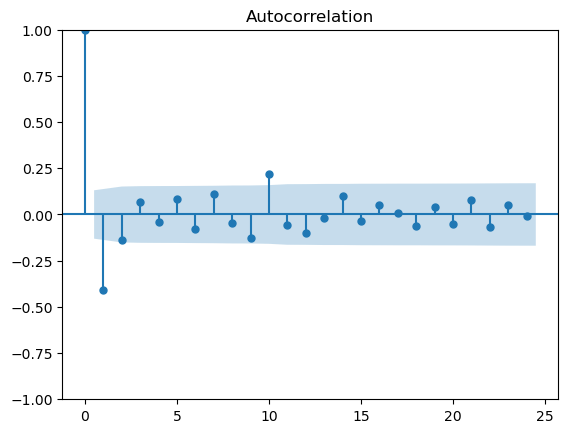

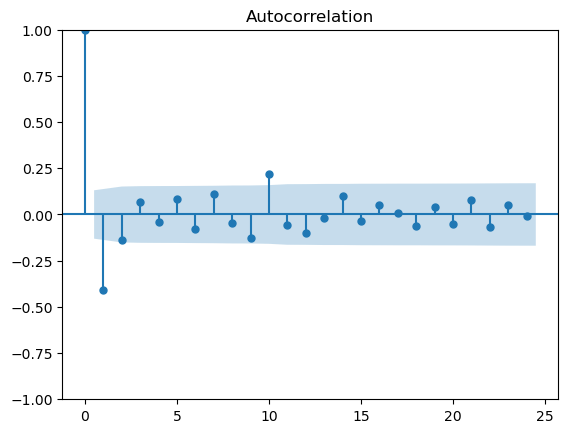

In [8]:
graphics.tsaplots.plot_acf(df_diffed["Housing Starts (thousands of units)"])

In [95]:
import statsmodels.api as sm
fig, ax = plt.subplots(nrows=1, ncols=1)
graphics.tsaplots.plot_pacf(df_diffed["Housing Starts (thousands of units)"], ax = ax)

ax.xlabel = "Lag"
ax.title = "Housing Starts pacf"

house = df_diffed["Housing Starts (thousands of units)"].iloc[1:]
dataframe_columns = {"Housing Starts (thousands of units)": house}

# "Housing Starts (thousands of units)":[1,2,3,4,5,10] 
fig.show()

Error in callback <function _draw_all_if_interactive at 0x0000024B9EF25EE0> (for post_execute):


C:\Users\thewa\AppData\Local\Temp\ipykernel_4704\2438349559.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


AttributeError: 'str' object has no attribute 'sticky_edges'

AttributeError: 'str' object has no attribute 'get_position'

<Figure size 640x480 with 1 Axes>

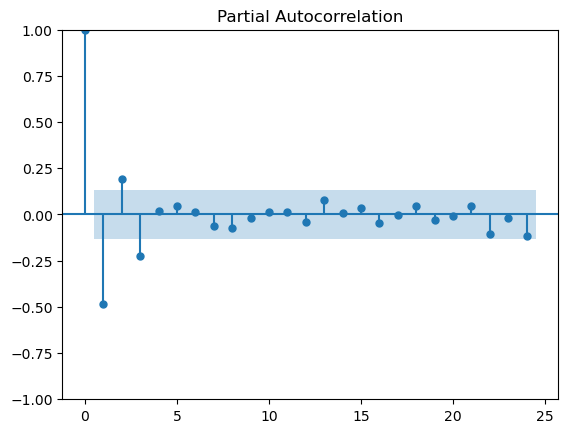

In [10]:
graphics.tsaplots.plot_pacf(df_diffed2["Home Price Index"])

dataframe_columns["Home Price Index"] = df_diffed2["Home Price Index"]

# "Home Price Index": [1,2,3] 

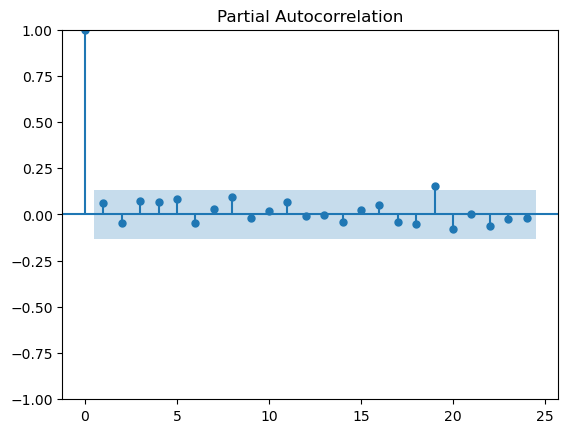

In [11]:
graphics.tsaplots.plot_pacf(df_diffed["S&P 500 Closing Price (USD)"])

dataframe_columns["S&P 500 Closing Price (USD)"] = df_diffed["S&P 500 Closing Price (USD)"].iloc[1:]
# "S&P 500 Closing Price (USD)": [1,2,3,4,7] 

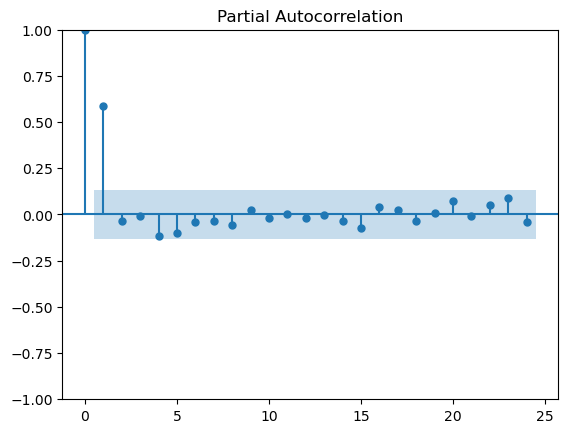

In [12]:
graphics.tsaplots.plot_pacf(df_diffed["Construction Index"])
# Result: [1,2,8] 
dataframe_columns["Construction Index"] = df_diffed["Construction Index"].iloc[1:]


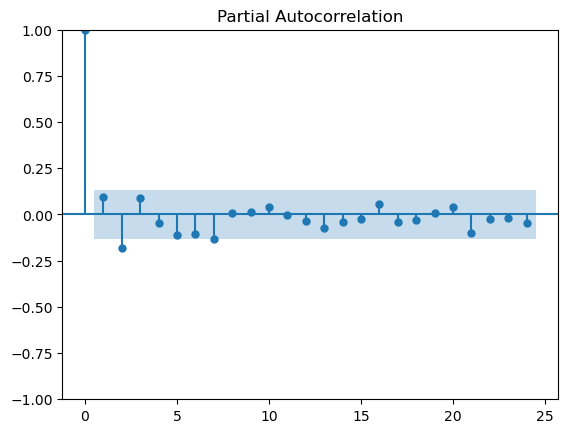

In [13]:
graphics.tsaplots.plot_pacf(df_diffed["Bond Yield (US)"])
# "Bond Yield (US)": [1,2,3,7,8,9] 

dataframe_columns["Bond Yield (US)"] = df_diffed["Bond Yield (US)"].iloc[1:]


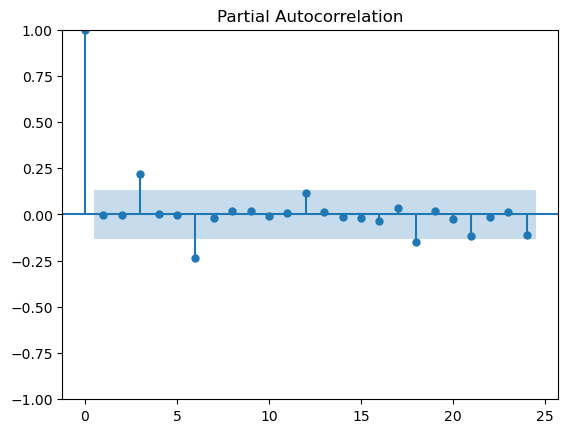

In [14]:
graphics.tsaplots.plot_pacf(df_diffed2["Land Prices"])
# Result: "Land Prices": [3,6] 

dataframe_columns["Land Prices"] = df_diffed2["Land Prices"]



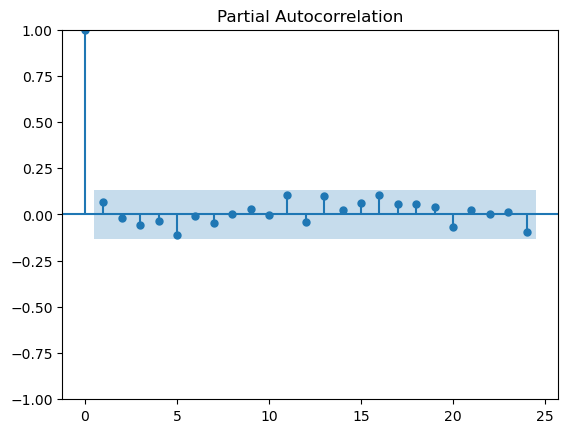

In [15]:
graphics.tsaplots.plot_pacf(df_diffed["\"Wages\""])
# "\"Wages\"": [1,2,3,5,10] 

dataframe_columns["\"Wages\""] = df_diffed["\"Wages\""].iloc[1:]


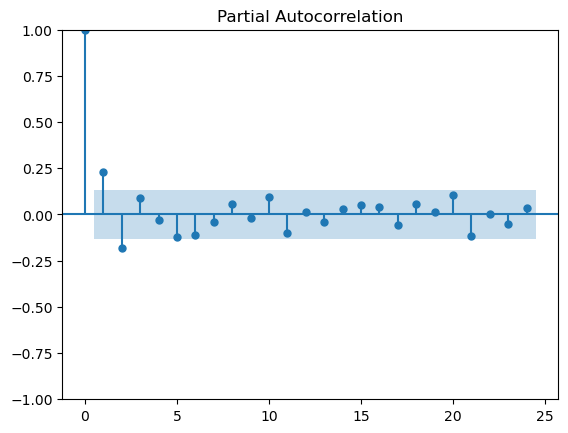

In [16]:
graphics.tsaplots.plot_pacf(df_diffed["Mortgage Rates"])
# Result: "Mortgage Rates": [1,2,3,6,7,9] 

dataframe_columns["Mortgage Rates"] = df_diffed["Mortgage Rates"].iloc[1:]


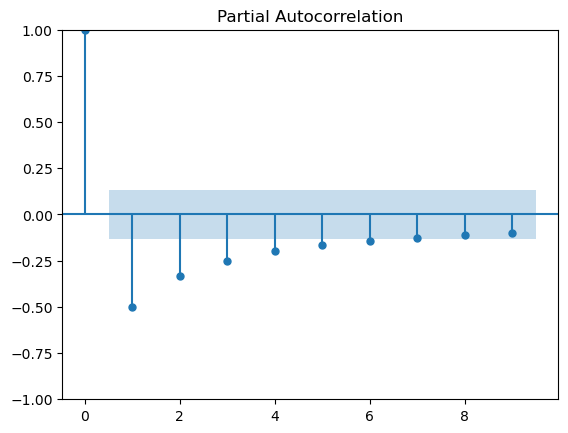

In [17]:
graphics.tsaplots.plot_pacf(df_diffed2["Population"], lags = [i for i in range(10)])
# Result: "Population":[1,2,3,4,5] 

dataframe_columns["Population"] = df_diffed2["Population"]


In [18]:
df_final = pd.DataFrame(data = dataframe_columns)
df_final.index = range(0, len(df_final))
df

,Date,Year,Month,Housing Starts (thousands of units),Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
1,2000-01-01,2000.0,1.0,2303.107435,101.077268,1394.46,144.1,6.670000,0.941,41.111027,8.21,254.36
2,2000-02-01,2000.0,2.0,2612.638623,101.657995,1366.42,144.7,6.410000,0.950,40.563314,8.33,254.36
3,2000-03-01,2000.0,3.0,1776.462464,102.944145,1498.58,145.4,6.140000,0.960,40.175730,8.24,254.36
4,2000-04-01,2000.0,4.0,1846.393039,103.482366,1452.43,145.6,6.270000,0.969,39.891525,8.15,254.36
5,2000-05-01,2000.0,5.0,1839.452917,104.217188,1420.60,144.9,6.360000,0.979,40.090237,8.52,254.36
...,...,...,...,...,...,...,...,...,...,...,...,...
221,2018-05-01,2018.0,5.0,1654.192481,251.301384,2705.27,236.8,3.087727,2.919,66.901809,4.59,328.13
222,2018-06-01,2018.0,6.0,2466.165888,252.655254,2718.37,239.2,3.013810,2.964,66.993828,4.57,328.13
223,2018-07-01,2018.0,7.0,1240.756969,252.685891,2816.29,239.6,2.976667,3.009,67.305540,4.53,328.13
224,2018-08-01,2018.0,8.0,2026.036629,251.054972,2901.52,239.4,3.006087,3.009,67.421234,4.55,328.13


In [19]:
cutoff_data = df_diffed2.iloc[:178]
cutoff_data2 = cutoff_data[["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]
cutoff_data["Housing Starts (thousands of units)"]

3     -1145.707347
4       906.106734
5       -76.870697
6        71.156493
7       -67.543499
          ...     
176   -1024.572196
177    1270.423046
178   -1169.303863
179     229.182959
180     229.974947
Name: Housing Starts (thousands of units), Length: 178, dtype: float64

In [20]:
cutoff_data2

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
3,0.705422,160.20,1.000000e-01,-0.010000,0.001,0.160128,-0.21,0.0
4,-0.747928,-178.31,-5.000000e-01,0.400000,-0.001,0.103378,0.00,0.0
5,0.196600,14.32,-9.000000e-01,-0.040000,0.001,0.482918,0.46,0.0
6,-0.519448,65.83,8.000000e-01,-0.250000,0.001,-0.124505,-0.60,0.0
7,0.287828,-57.77,-7.000000e-01,0.040000,-0.001,0.050298,0.09,0.0
...,...,...,...,...,...,...,...,...
176,0.233003,102.26,4.000000e-01,-0.047577,-0.003,0.198540,0.02,0.0
177,-0.039760,-103.78,-5.000000e-01,0.204265,-0.001,-0.217866,0.05,0.0
178,0.572015,76.84,2.842171e-14,-0.304373,0.001,0.573297,-0.16,0.0
179,-0.591861,3.75,-3.000000e-01,0.242555,0.007,-0.399833,0.08,0.0


In [59]:
#"Housing Starts (thousands of units)":[1,2,3,4,5,10], 
dict = {"Home Price Index": [0,1,2,3], "S&P 500 Closing Price (USD)": [0], "Construction Index": [0,1], "Bond Yield (US)": [0,2], "Land Prices": [3,6], "\"Wages\"": [0], "Mortgage Rates": [0,2], "Population":[1,2,3,4,5,6]}

from statsmodels.tsa.api import ARDL

model = ARDL(cutoff_data["Housing Starts (thousands of units)"], [1,2,3,4], cutoff_data2, dict)
ardl_model = model.fit()

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
ardl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       ARDL Model Results                                      
===============================================================================================
Dep. Variable:     Housing Starts (thousands of units)   No. Observations:                  178
Model:                 ARDL(4, 3, 0, 1, 2, 6, 0, 2, 6)   Log Likelihood               -1280.850
Method:                                Conditional MLE   S.D. of innovations            380.798
Date:                                 Fri, 01 Mar 2024   AIC                           2613.700
Time:                                         20:00:23   BIC                           2695.836
Sample:                                              6   HQIC                          2647.019
                                                   178                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.4070     31.604     -0.139      0.889     -66.857      58.043
Housing Starts (thousands of units).L1    -1.2389      0.075    -16.626      0.000      -1.386      -1.092
Housing Starts (thousands of units).L2    -1.2084      0.109    -11.098      0.000      -1.424      -0.993
Housing Starts (thousands of units).L3    -0.8194      0.110     -7.436      0.000      -1.037      -0.602
Housing Starts (thousands of units).L4    -0.4344      0.077     -5.670      0.000      -0.586      -0.283
Home Price Index.L0                       57.0409     62.491      0.913      0.363     -66.441     180.523
Home Price Index.L1                       62.3972     67.599      0.923      0.357     -71.180     195.974
Home Price Index.L2                       59.3921     69.022      0.860      0.391     -76.996     195.781
Home Price Index.L3                       31.1244     62.116      0.501      0.617     -91.618     153.867
S&P 500 Closing Price (USD).L0             0.3828      0.496      0.772      0.441      -0.597       1.362
Construction Index.L0                     -4.4756     26.494     -0.169      0.866     -56.828      47.877
Construction Index.L1                     35.9283     27.923      1.287      0.200     -19.248      91.105
Bond Yield (US).L0                       161.8218    133.393      1.213      0.227    -101.764     425.407
Bond Yield (US).L2                       250.4725    133.240      1.880      0.062     -12.812     513.757
Land Prices.L3                         -1.121e+04   7020.213     -1.596      0.113   -2.51e+04    2664.467
Land Prices.L6                          -190.4777   6867.951     -0.028      0.978   -1.38e+04    1.34e+04
"Wages".L0                                10.1197     75.410      0.134      0.893    -138.891     159.130
Mortgage Rates.L0                         48.9697    190.894      0.257      0.798    -328.240     426.179
Mortgage Rates.L2                        -23.6304    187.583     -0.126      0.900    -394.296     347.035
Population.L1                             14.5102     29.392      0.494      0.622     -43.569      72.589
Population.L2                              2.0532     36.191      0.057      0.955     -69.461      73.567
Population.L3                             20.2628     38.873      0.521      0.603     -56.551      97.077
Population.L4                             10.4872     38.308      0.274      0.785     -65.211      86.185
Population.L5                            -13.8628     35.527     -0.390      0.697     -84.064      56.338
Population.L6                              6.6207     27.630      0.240      0.811     -47.977      61.218
============================================================================================

In [64]:
ardl_model.predict(15,25)

18   -297.462522
19    512.591495
20    -66.049049
21   -308.091209
22    392.754965
23   -371.333864
24     32.921892
25   -163.627547
26           NaN
27           NaN
28           NaN
dtype: float64

In [22]:
x = list(ardl_model.predict(13, 58, exog_oos = df_final[166:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))
y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][2]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][2])
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing Starts (thousands of units)"][1]] + list(np.asarray(z) + df["Housing Starts (thousands of units)"][1])
z

[2303.10743478912,
 2612.63862255433,
 2760.8147671044558,
 2555.260384679909,
 2213.5985235117264,
 2428.7274962586775,
 2875.2699416261116,
 2501.129683057623,
 2585.793438415868,
 2607.2145393539226,
 2268.8025678709564,
 2138.0969134148986,
 1852.4228476975125,
 1213.081763430308,
 797.979295640077,
 1710.2706271140537,
 2543.004477280233,
 2735.821212682312,
 2146.034600190569,
 1278.3524874814316,
 1699.4003283356806,
 2152.6700461861888,
 2051.221393441354,
 2000.8174054575597,
 2120.52095863457,
 1910.7074404058096,
 1967.7258691099141,
 2190.6184567755436,
 1831.760005679256,
 1658.1866511407068,
 2055.4305718721967,
 3211.463626767602,
 3162.8784710979844,
 1952.382881527834,
 1734.5362069436346,
 1961.7027314200998,
 2019.1111884199413,
 2545.377925570743,
 2096.248605062815,
 1408.814773696899,
 2131.0584680948195,
 1051.43413190504,
 788.2482796380436,
 2360.3057495449034,
 2174.587483634527,
 nan,
 nan,
 nan]

In [23]:
len(x)
print(1-sum((np.asarray(df["Housing Starts (thousands of units)"][180:]) - np.asarray(z[:-3]))**2) / sum((np.asarray(df["Housing Starts (thousands of units)"][180:]) - np.mean(df["Housing Starts (thousands of units)"][180:]))**2))

-0.9313020430403587


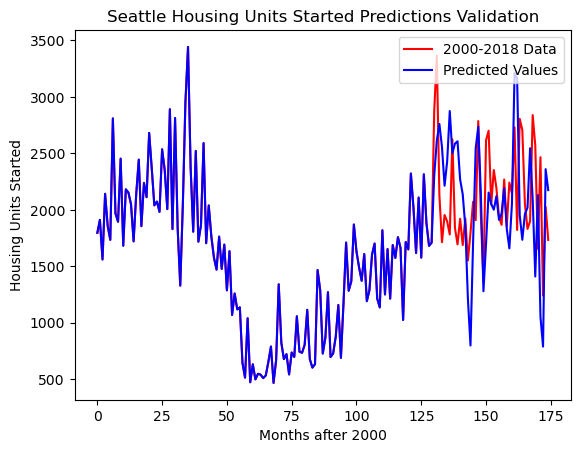

In [85]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(175)], df["Housing Starts (thousands of units)"][50:], "r", label = "2000-2018 Data")
plt.plot(list([i for i in range(175)]), list(df["Housing Starts (thousands of units)"][50:180]) + z[:-3], "b", label = "Predicted Values")

leg = plt.legend(loc='upper right')
plt.title("Seattle Housing Units Started Predictions Validation")
plt.xlabel("Months after 2000")
plt.ylabel("Housing Units Started")
plt.show()

In [25]:
ardl_model.forecast(50, cutoff_data2[-50:])

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


178     -4.431727
179      4.517865
180   -288.532006
181    380.860482
182   -315.117224
183    366.544828
184   -275.127880
185    -36.760898
186    245.731406
187   -484.737551
188    477.096893
189   -224.003873
190    -32.333501
191    270.759824
192   -246.377044
193    271.155005
194   -207.928999
195     15.035148
196    -54.074169
197     32.658873
198    171.919844
199   -368.225976
200    194.660487
201    130.725143
202   -264.310453
203    220.380786
204    -83.325514
205     59.764804
206    -48.810774
207    -17.586851
208    199.141712
209   -420.087523
210    543.606058
211   -553.797780
212    294.600102
213   -101.011502
214    -57.658078
215    111.608766
216   -218.948035
217    600.912937
218   -717.357596
219    392.337335
220    -88.452622
221   -155.824562
222    299.863638
223   -240.591249
224    109.382808
225    -47.669683
226    121.473804
227   -168.335390
dtype: float64

In [26]:
list(cutoff_data2["Home Price Index"])[-1]

0.8440450164250137

In [27]:
np.std(cutoff_data2["Home Price Index"])

0.6663405500900149

In [28]:
list(cutoff_data2["Home Price Index"])[-1] + np.random.rand() * 2 * np.std(cutoff_data2["Home Price Index"])

1.189719196290472

In [29]:
def funx(name):
    return(list(cutoff_data2[name])[-1] + np.random.rand() * 2 * np.std(cutoff_data2[name]))

In [30]:
[funx("Home Price Index"), funx("S&P 500 Closing Price (USD)"), funx("Construction Index"), funx("Bond Yield (US)"), funx("Land Prices"), funx("\"Wages\""), funx("Mortgage Rates"), funx("Population")]

[1.1855390056425315,
 -38.556558969145165,
 -0.07197532994377667,
 -0.022211579608866522,
 0.0008278972605654856,
 0.5023707574636642,
 0.31383236246827034,
 2.1144921518297903]

In [31]:
cutoff_data2.iloc[c%168] 

NameError: name 'c' is not defined

In [56]:
import random
np.random.seed(seed = 6)
rand = np.random.random(6030)
cutoff_data3 = pd.DataFrame(columns = ["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"])
c = 0
for i in range(602):
    cutoff_data3.loc[c] = cutoff_data2.iloc[c%168] + [rand[10 * i + ind] * 2 * np.std(cutoff_data2[name]) - np.std(cutoff_data2[name]) for ind, name in enumerate(["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"])]
    #cutoff_data3.loc[c] = [funx("Home Price Index"), funx("S&P 500 Closing Price (USD)"), funx("Construction Index"), funx("Bond Yield (US)"), funx("Land Prices"), funx("\"Wages\""), funx("Mortgage Rates"), funx("Population")]
    c += 1
cutoff_data3

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,1.228980,136.604191,0.890648,-0.291345,-0.002942,0.245738,-0.196332,-0.249459
1,-0.830366,-145.184046,-0.455607,0.448410,0.000460,0.544904,0.146622,-0.266685
2,-0.397143,45.024181,-0.156261,0.105126,0.003101,0.519789,0.288021,1.406094
3,-0.229888,135.233708,0.198488,-0.144836,0.001995,0.071237,-0.399521,-0.455306
4,0.616348,-26.302792,-0.931099,0.340423,-0.001497,-0.063357,0.186093,-1.282871
...,...,...,...,...,...,...,...,...
597,0.911306,76.644546,0.189989,0.179446,-0.003502,0.012672,0.220726,0.138240
598,-0.022244,-105.747990,1.491294,-0.213222,-0.004228,0.285828,-0.267634,4.812896
599,0.365226,59.894179,0.254102,0.384195,-0.002870,-0.481177,0.288474,-4.214267
600,-1.065546,92.286055,0.745010,-0.529222,-0.002049,0.030141,0.116013,-0.353524


In [ ]:
cutoff_data3.columns

Index(['Home Price Index', 'S&P 500 Closing Price (USD)', 'Construction Index',
       'Bond Yield (US)', 'Land Prices', '"Wages"', 'Mortgage Rates',
       'Population'],
      dtype='object')

In [ ]:
cutoff_data2.columns

Index(['Home Price Index', 'S&P 500 Closing Price (USD)', 'Construction Index',
       'Bond Yield (US)', 'Land Prices', '"Wages"', 'Mortgage Rates',
       'Population'],
      dtype='object')

In [ ]:
cutoff_data2.reset_index(drop=True)

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,0.705422,160.20,1.000000e-01,-0.010000,0.001,0.160128,-0.21,0.0
1,-0.747928,-178.31,-5.000000e-01,0.400000,-0.001,0.103378,0.00,0.0
2,0.196600,14.32,-9.000000e-01,-0.040000,0.001,0.482918,0.46,0.0
3,-0.519448,65.83,8.000000e-01,-0.250000,0.001,-0.124505,-0.60,0.0
4,0.287828,-57.77,-7.000000e-01,0.040000,-0.001,0.050298,0.09,0.0
...,...,...,...,...,...,...,...,...
173,0.233003,102.26,4.000000e-01,-0.047577,-0.003,0.198540,0.02,0.0
174,-0.039760,-103.78,-5.000000e-01,0.204265,-0.001,-0.217866,0.05,0.0
175,0.572015,76.84,2.842171e-14,-0.304373,0.001,0.573297,-0.16,0.0
176,-0.591861,3.75,-3.000000e-01,0.242555,0.007,-0.399833,0.08,0.0


In [57]:
x = list(ardl_model.forecast(598, cutoff_data3))
y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][2]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][2])
z2 = []
for i in range(len(y)):
    if i == 0:
        z2.append(y[i])
    else:
        z2.append(y[i] + y[i-1])

z2 = [df["Housing Starts (thousands of units)"][1]] + list(np.asarray(z2) + df["Housing Starts (thousands of units)"][1])
z2

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[2303.10743478912,
 2612.63862255433,
 2901.824981218398,
 2939.9385031943275,
 2648.356731341103,
 2684.148689755179,
 3008.958945351504,
 2772.3844227290874,
 2792.0217348494866,
 2830.3068481757355,
 2746.6782813858945,
 2787.3861470336037,
 2646.2415795201127,
 2659.2399468719436,
 2983.1861757472843,
 2984.3146803653844,
 2643.6995462766627,
 2637.18144913788,
 2570.5175896996125,
 2488.4687463267924,
 2647.248335106574,
 2525.750868759821,
 2712.101104923833,
 2504.0101901048974,
 2534.1386089450702,
 2864.1957252921798,
 2581.1872987542024,
 2630.6576930409447,
 2705.2690610271334,
 2421.234609501585,
 2537.552915634218,
 2727.571133542715,
 2412.5334153552662,
 2562.6404337190615,
 2542.066606393765,
 2568.634654933464,
 2609.7181354030186,
 2286.73393536902,
 2610.7561055823735,
 2392.259698940479,
 2083.4002772696413,
 2249.3000636380166,
 2275.745978829053,
 2488.1441530438246,
 2285.2437586095666,
 2305.8880249688004,
 2192.5813911423015,
 2353.74258727747,
 2588.7145164399

In [ ]:
len(z2)

50

In [ ]:
len(z)

48

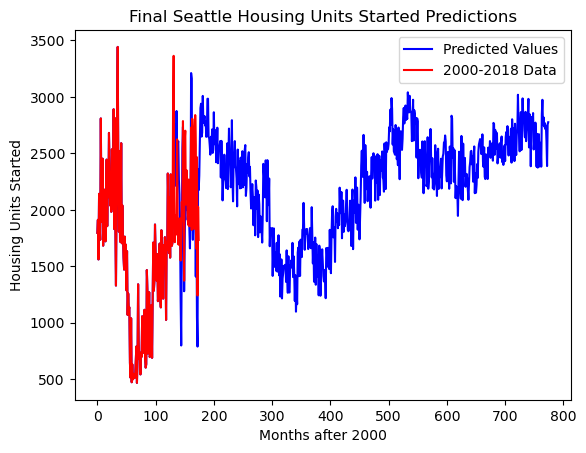

In [83]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list([i for i in range(775)]), list(df["Housing Starts (thousands of units)"][50:180]) + z[:-3] + z2, "b", label='Predicted Values')
plt.plot([i for i in range(175)], df["Housing Starts (thousands of units)"][50:], "r", label='2000-2018 Data')
leg = plt.legend(loc='upper right')
plt.title("Final Seattle Housing Units Started Predictions")
plt.xlabel("Months after 2000")
plt.ylabel("Housing Units Started")
plt.show()

OLD

In [ ]:
x = list(ardl_model.predict(10, 62, exog_oos = df_diffed2[170:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))[:-3]
y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][180]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][180])
print(y)
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing Starts (thousands of units)"][179]] + list(np.asarray(z) + df["Housing Starts (thousands of units)"][179])
z

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i+178 for i in range(len(z))], z, "b")
plt.plot([i for i in range(len(df["Housing Starts (thousands of units)"]))], df["Housing Starts (thousands of units)"], "r")
plt.show()

In [ ]:
x = list(ardl_model.predict(10, 100, exog_oos = df_diffed2[166:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))[:-3]

y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][177]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][177])
print(y)
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing Starts (thousands of units)"][176]] + list(np.asarray(z) + df["Housing Starts (thousands of units)"][176])
z

In [ ]:
x = list(ardl_model.predict(10, 46, exog_oos = df_diffed2[166:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))[:-3]

y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][177]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][177])
print(y)
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing Starts (thousands of units)"][176]] + list(np.asarray(z) + df["Housing Starts (thousands of units)"][176])
z

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(len(list(ardl_model.predict(0, 166)[7:164]) + list([i for i in range(len(x))])))], list(ardl_model.predict(0, 166)[7:164]) + x, "b")
plt.plot([i for i in range(len(df_diffed2["Housing Starts (thousands of units)"]))], df_diffed2["Housing Starts (thousands of units)"], "r")
plt.show()

In [ ]:
import statsmodels.api as sm
graphics.tsaplots.plot_pacf(df_diffed["Housing Starts (thousands of units)"])

In [ ]:
res = arimamodel.fit()
res.summary()

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(len(res.predict(0)))], res.predict(0), "b")
plt.plot([i for i in range(len(res.predict(0)))], df_diffed2["Housing Starts (thousands of units)"][:(len(res.predict(0)))], "r")
plt.show()

In [ ]:
x = []
for i in range(len(res.predict(0)),225):
    x.append(float(res.predict(i)))

import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(len(res.predict(0)))], df_diffed2["Housing Starts (thousands of units)"][:(len(res.predict(0)))], "r")
plt.plot([i for i in range(225)], list(res.predict(0))+list(x), "b")
plt.show()